<a href="https://colab.research.google.com/github/PRASHANTH6666/ML-ASSIGNMENT/blob/main/Final_project_Customer_conversion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
import pandas_profiling

In [ ]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
data.shape

(45211, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
data.dtypes #  all column in the dataset is in right format

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
data = data.drop_duplicates()  #dropping duplicates in the dataset

In [ ]:
data.shape

(45205, 11)

In [ ]:
data.isnull().sum() # no null values in the dataset

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**EDA** - Exploratory Data Aanalysis

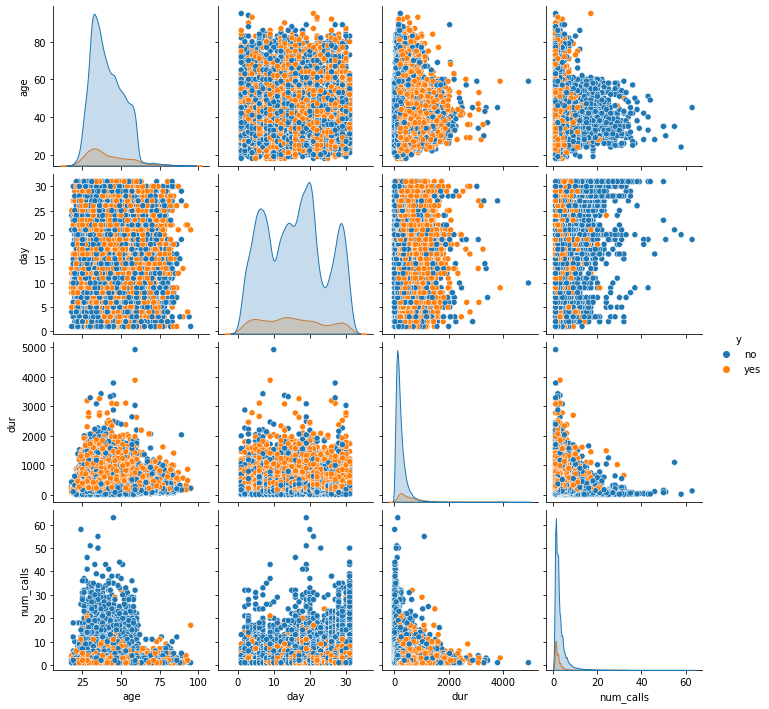

In [ ]:
sns.pairplot(data, hue='y')

In [ ]:
data['job'].value_counts() # since  job column is categorical imputation is done with mode

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
data['job'] = data['job'].replace('unknown','blue-collar') #replacing unknown with blue-collar

<ipython-input-16-d41a4386342d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job'] = data['job'].replace('unknown','blue-collar') #replacing unknown with blue-collar


In [ ]:
data['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
data['education_qual'].value_counts() #since educational_qual column is categorical imputation is done with mode

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
data['education_qual'] = data['education_qual'].replace('unknown','secondary') # replacing unknown with secondary

<ipython-input-19-89187f73f1e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education_qual'] = data['education_qual'].replace('unknown','secondary') # replacing unknown with secondary


In [ ]:
data['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
data['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
data['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
# imputation for call type and previous outcomes makes no sense as the column contains lots of unknown value ,hence we consider unknown as a category.

In [ ]:
data['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [ ]:
data['target'] = data['y'].map({'yes':1 , 'no':0})

<ipython-input-25-32ba9dc5061a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['y'].map({'yes':1 , 'no':0})


In [ ]:
data.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [ ]:
data.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: target, dtype: float64

In [ ]:
del data['y'] # hence we have encode the y column as target we are deleting the y column.

In [ ]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0


<Axes: ylabel='job'>

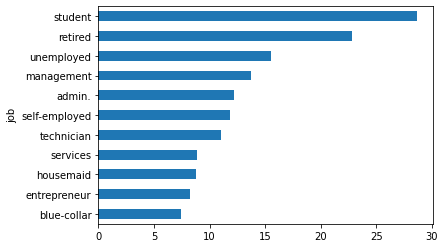

In [ ]:
 (data.groupby('job')['target'].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='education_qual'>

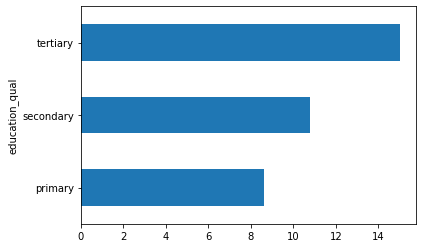

In [ ]:
(data.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='prev_outcome'>

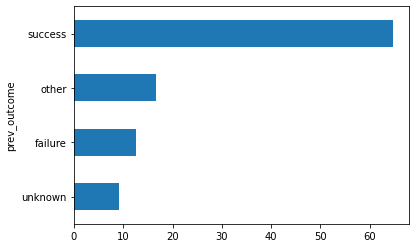

In [ ]:
(data.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='call_type'>

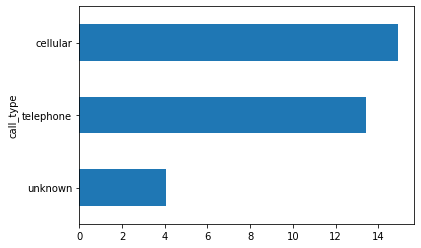

In [ ]:
(data.groupby('call_type')['target'].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='mon'>

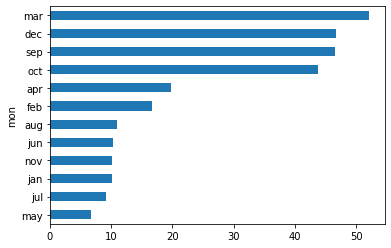

In [ ]:
(data.groupby('mon')['target'].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='marital'>

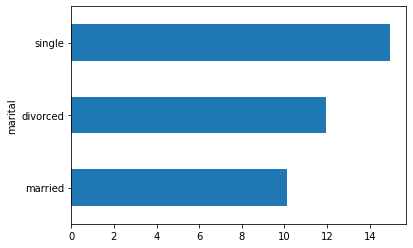

In [ ]:
(data.groupby('marital')['target'].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='day'>

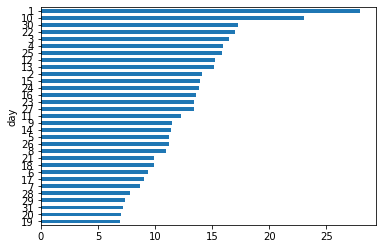

In [ ]:
(data.groupby('day')['target'].mean()*100).sort_values().plot(kind = 'barh')

<Axes: xlabel='target', ylabel='age'>

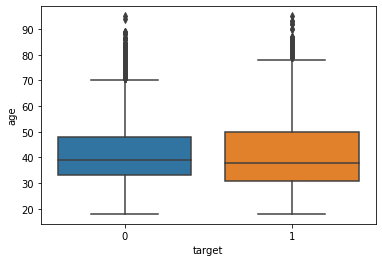

In [ ]:
sns.boxplot(data,x='target',y='age')

<Axes: xlabel='target', ylabel='dur'>

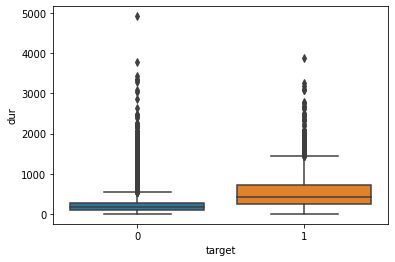

In [ ]:
sns.boxplot(data,x='target',y='dur')

<Axes: xlabel='target', ylabel='num_calls'>

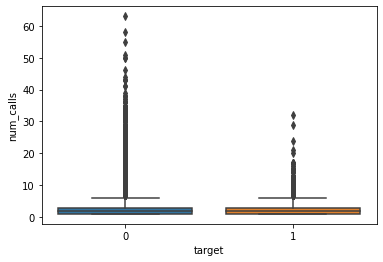

In [ ]:
sns.boxplot(data,x='target',y='num_calls')

**ENCODING**

In [ ]:
data['call_type'] = data['call_type'].map({'unknown':0,'telephone':1,'cellular':2})

<ipython-input-40-31f8ce720eb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['call_type'] = data['call_type'].map({'unknown':0,'telephone':1,'cellular':2})


In [ ]:
data['call_type'].value_counts()

2    29282
0    13017
1     2906
Name: call_type, dtype: int64

In [ ]:
#data['marital'] = data['marital'].map({'married':0,'divorced':1,'single':2})

In [ ]:
data['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
#data['prev_outcome'] = data['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

In [ ]:
data['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
data['education_qual'] = data['education_qual'].map({'primary':0,'secondary':1,'tertiary':2})

<ipython-input-46-c4f46e399d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education_qual'] = data['education_qual'].map({'primary':0,'secondary':1,'tertiary':2})


In [ ]:
data['education_qual'].value_counts()

1    25056
2    13299
0     6850
Name: education_qual, dtype: int64

In [ ]:
data['mon'] = data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

<ipython-input-48-6da99e722659>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mon'] = data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})


In [ ]:
data['mon'].value_counts()

0     13765
1      6894
5      6245
4      5339
3      3970
7      2932
6      2649
2      1403
8       738
9       579
11      477
10      214
Name: mon, dtype: int64

In [ ]:
(data.groupby('job')['target'].mean()*100).sort_values()

job
blue-collar       7.406668
entrepreneur      8.271688
housemaid         8.790323
services          8.885143
technician       11.058452
self-employed    11.842939
admin.           12.205029
management       13.757005
unemployed       15.502686
retired          22.791519
student          28.678038
Name: target, dtype: float64

In [ ]:
data['job'] = data['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})

<ipython-input-51-f63843702f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job'] = data['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})


In [ ]:
data['job'].value_counts()

0     10018
7      9457
4      7596
6      5170
3      4153
9      2264
5      1579
1      1487
8      1303
2      1240
10      938
Name: job, dtype: int64

In [ ]:
(data.groupby('day')['target'].mean()*100).sort_values()

day
19     6.947608
20     6.976744
31     7.153966
29     7.392550
28     7.818480
7      8.640616
17     9.076844
6      9.368530
18     9.878683
21     9.921027
8     10.923913
26    11.207729
5     11.256545
14    11.363636
9     11.474359
11    12.237999
27    13.380910
23    13.418530
16    13.568905
24    13.870246
15    13.975338
2     14.086687
13    15.205047
12    15.221460
25    15.833333
4     15.916955
3     16.496756
22    17.016575
30    17.305236
10    23.091603
1     27.950311
Name: target, dtype: float64

In [ ]:
#data['day']= data['day'].map({19:0,20:1,31:2,29:3,28:4,7:5,17:6,6:7,18:8,21:9,8:10,26:11,5:12,14:13,9:14,11:15,27:16,23:17,16:18,24:19,15:20,2:21,13:22,12:23,25:24,4:25,3:26,22:27,30:28,10:29,1:30})

In [ ]:
#all the encodings(label encoding) are done based on the realtionship between the features and the target variable
#and the numbering is based on the percentage of conversion rate.

In [ ]:
data = pd.get_dummies(data,columns=['marital','prev_outcome'])

**SPLITTING OF THE DATSET**

In [ ]:
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,target,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,7,2,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,1,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,0,1,0,5,0,198,1,0,0,0,1,0,0,0,1


In [ ]:
data.columns

Index(['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'target', 'marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown'],
      dtype='object')

In [ ]:
x = data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data[['target']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20 )

**BALANCING DATASET**

In [ ]:
#As we know that percentage of conversion is less that non conversion in the given  datset hence balancing is done. 

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train, y_train)

In [ ]:
len(x_smt), len(y_smt) # dataset is balanced

(53751, 53751)

**MODEL FITTING**

**Model: LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_smt,y_smt)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8088707001437894

**Model: KNN**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_smt,y_smt)
knn.score(x_test,y_test)

0.7389669284371198

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10]:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_smt,y_smt)
  print('k-value:',i, 'train_score:',knn.score(x_smt,y_smt),'cross_val_score:',np.mean(cross_val_score(knn,x_smt,y_smt,cv=10)))


k-value: 1 train_score: 1.0 cross_val_score: 0.9941232352507189
k-value: 2 train_score: 0.9998134363164867 cross_val_score: 0.9945710034049116
k-value: 3 train_score: 0.9965858845917054 cross_val_score: 0.9860450684462411
k-value: 4 train_score: 0.9967911046435701 cross_val_score: 0.9871644540309088
k-value: 5 train_score: 0.990802410402791 cross_val_score: 0.9765863220272447
k-value: 6 train_score: 0.9911195686647637 cross_val_score: 0.9782281061118582
k-value: 7 train_score: 0.9834704576407156 cross_val_score: 0.9674447015064578
k-value: 8 train_score: 0.9841980560064177 cross_val_score: 0.9696462010039338
k-value: 9 train_score: 0.9754668756179922 cross_val_score: 0.9598329595725904
k-value: 10 train_score: 0.9763623812988563 cross_val_score: 0.961568034199456


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_smt,y_smt)
knn.score(x_test,y_test)

0.7951554031633669

**Model:DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_smt, y_smt)
dt_pred = dt.predict(x_test)
acc = accuracy_score(y_test, dt_pred)
acc


0.8345315783652251

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_smt, y_smt)
  trainAccuracy = accuracy_score(y_smt, dt.predict(x_smt))
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_smt, y_smt, cv=10) # syntax : cross_val_Score
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7873360571631126  Cross val score :  0.7858061330170635
Depth  :  2  Training Accuracy :  0.8025036846327493  Cross val score :  0.8043696632951638
Depth  :  3  Training Accuracy :  0.8633047890897558  Cross val score :  0.8637908596357887
Depth  :  4  Training Accuracy :  0.9015690005783474  Cross val score :  0.9017564597271059
Depth  :  5  Training Accuracy :  0.9094419880226116  Cross val score :  0.9062344196755451
Depth  :  6  Training Accuracy :  0.9246842409656536  Cross val score :  0.9208795035733475
Depth  :  7  Training Accuracy :  0.938116826178616  Cross val score :  0.9315695619551934
Depth  :  8  Training Accuracy :  0.9460644390962856  Cross val score :  0.9386216580778258
Depth  :  9  Training Accuracy :  0.9531352027014421  Cross val score :  0.9429873401598611
Depth  :  10  Training Accuracy :  0.9616425066696517  Cross val score :  0.9455994022612177
Depth  :  20  Training Accuracy :  0.9995149344228652  Cross val score :  0.9572

In [ ]:
dt = DecisionTreeClassifier(max_depth=22)
dt.fit(x_smt, y_smt)
dt_pred = dt.predict(x_test)
acc = accuracy_score(y_test, dt_pred)
acc

0.8364119013383475

**Model:XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_smt,y_smt) #train the model
  model.score(x_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(x_smt,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.9402623085390198  Cross-Val score :  0.8959183249401065
Learning rate :  0.02  Train score :  0.9473330721441764  Cross-Val score :  0.8953652275949737
Learning rate :  0.03  Train score :  0.9539933956456036  Cross-Val score :  0.8971350168679411
Learning rate :  0.04  Train score :  0.9582843603664111  Cross-Val score :  0.8980197281572385
Learning rate :  0.05  Train score :  0.9613626611443816  Cross-Val score :  0.9006741064880458
Learning rate :  0.06  Train score :  0.9640678345553254  Cross-Val score :  0.901116584364152
Learning rate :  0.07  Train score :  0.9657469077069457  Cross-Val score :  0.9020015401163644
Learning rate :  0.08  Train score :  0.969086397641835  Cross-Val score :  0.9007847259570724
Learning rate :  0.09  Train score :  0.970578907109942  Cross-Val score :  0.9007846037256149
Learning rate :  0.1  Train score :  0.9719221656312382  Cross-Val score :  0.9007848481885299
Learning rate :  0.11  Train score :  0.9727

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0)
model.fit(x_smt,y_smt) 
roc_auc_score(y_test,model.predict_proba(x_test)[:,1])

0.9240385523750634

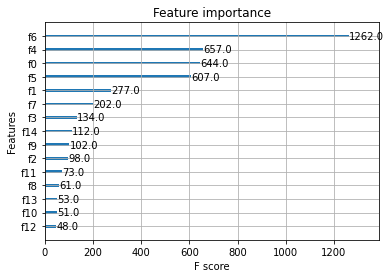

In [ ]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

#From the above analysis we came to know that job, duration, month, age,number of calls, day and marital status features plays a major role and numbers of calls made to the customers need to improve on the month of march and have to consider their employment and education qualification for successive conversion of customers.